In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Update path to data

data_path = 'Desktop/Football Analytics/Data/'
data_provider = 'Metrica/data/'

### Experiments with Event Data

In [5]:
# Metrica data folder contains 3 csvs per game - event_data, tracking_data_home, tracking_data_away
# Event data contains the log of each on-ball event

# Load event data from the specific match
match_id = 2

df_events = pd.read_csv(data_path + data_provider + f'Sample_Game_{match_id}/' + 
                        f'Sample_Game_{match_id}_RawEventsData.csv')

print(df_events.shape)
df_events.head()

(1935, 14)


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [6]:
df_events.describe()

,Period,Start Frame,Start Time [s],End Frame,End Time [s],Start X,Start Y,End X,End Y
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1849.000000,1849.000000,1221.000000,1221.000000
mean,1.468217,65422.160207,2616.886408,65444.214470,2617.768579,0.494446,0.518096,0.499476,0.512776
std,0.499118,39412.118805,1576.484752,39410.201977,1576.408079,0.238115,0.297417,0.229955,0.306112
min,1.000000,51.000000,2.040000,51.000000,2.040000,-0.010000,-0.030000,-0.080000,-0.040000
25%,1.000000,30974.500000,1238.980000,30978.000000,1239.120000,0.320000,0.250000,0.340000,0.240000
50%,1.000000,64182.000000,2567.280000,64239.000000,2569.560000,0.500000,0.520000,0.510000,0.520000
75%,2.000000,96722.000000,3868.880000,96756.000000,3870.240000,0.680000,0.790000,0.660000,0.780000
max,2.000000,140265.000000,5610.600000,140298.000000,5611.920000,1.030000,1.020000,1.020000,1.040000


In [7]:
df_events.columns

Index(['Team', 'Type', 'Subtype', 'Period', 'Start Frame', 'Start Time [s]',
       'End Frame', 'End Time [s]', 'From', 'To', 'Start X', 'Start Y',
       'End X', 'End Y'],
      dtype='object')

In [8]:
df_events['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

In [9]:
# df_events['Subtype'].value_counts()

In [10]:
home_events = df_events[df_events['Team'] == 'Home']
away_events = df_events[df_events['Team'] == 'Away']

print(home_events.shape)
print(away_events.shape)

(1044, 14)
(891, 14)


In [11]:
home_events['Type'].value_counts()

PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64

In [12]:
away_events['Type'].value_counts()

PASS              421
CHALLENGE         151
RECOVERY          113
BALL LOST         113
SET PIECE          46
BALL OUT           22
FAULT RECEIVED     11
SHOT               11
CARD                3
Name: Type, dtype: int64

In [13]:
shots = df_events[df_events['Type'] == 'SHOT']

home_shots = home_events[home_events['Type'] == 'SHOT'].copy()
away_shots = away_events[away_events['Type'] == 'SHOT'].copy()

home_goals = home_shots[home_shots['Subtype'].str.contains("-GOAL")].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains("-GOAL")].copy()

In [14]:
home_shots.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,0.13,0.23,-0.02,0.46
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,0.05,0.55,-0.01,0.53
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,0.11,0.33,0.04,0.49
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,0.09,0.59,-0.01,0.59
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,0.20,0.70,0.00,0.54


In [15]:
away_shots.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,0.80,0.35,0.86,0.33
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,0.92,0.46,1.01,0.48
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,0.93,0.49,1.01,0.60
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,0.77,0.55,0.99,0.53
1058,Away,SHOT,OFF TARGET-OUT,2,69887,2795.48,69927,2797.08,Player21,NaN,0.21,0.66,-0.03,0.38


In [16]:
home_shots['Subtype'].value_counts()

ON TARGET-SAVED        4
HEAD-OFF TARGET-OUT    4
ON TARGET-GOAL         2
OFF TARGET-OUT         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

In [17]:
away_shots['Subtype'].value_counts()

OFF TARGET-OUT         3
ON TARGET-SAVED        2
BLOCKED                2
ON TARGET-GOAL         2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: Subtype, dtype: int64

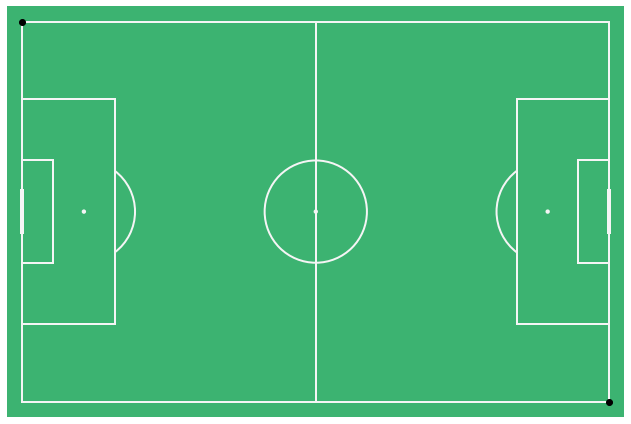

In [18]:
# Football PitchViz

from mplsoccer.pitch import Pitch

# Setup the pitch
pitch = Pitch(pitch_type='metricasports', orientation='horizontal',
              pitch_color='mediumseagreen', line_color='whitesmoke', pitch_length=105, pitch_width=68,
              figsize=(10, 6), constrained_layout=False, tight_layout=True)
              # figsize=(10, 6), constrained_layout=False, tight_layout=True, axis=True, label=True)

# Metrica Pitch Dimensions in metres - 105 x 68, but origin is top left and diagonally opposite is (1,1)
fig, ax = pitch.draw()

plt.plot(0,0,'o',color='k')
plt.plot(1,1,'o',color='k')

In [19]:
home_goals.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,0.05,0.55,-0.01,0.53
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,0.95,0.52,1.01,0.53
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,0.79,0.58,1.01,0.54


In [20]:
home_goals.loc[198]

Team                        Home
Type                        SHOT
Subtype           ON TARGET-GOAL
Period                         1
Start Frame                12202
Start Time [s]            488.08
End Frame                  12212
End Time [s]              488.48
From                    Player10
To                           NaN
Start X                     0.05
Start Y                     0.55
End X                      -0.01
End Y                       0.53
Name: 198, dtype: object

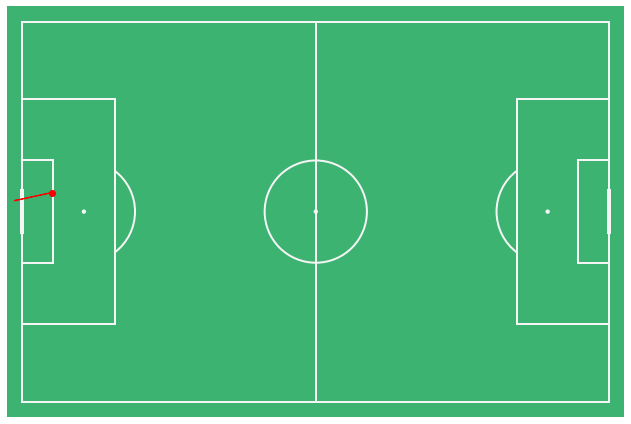

In [21]:
# Plotting the pitch and first goal

fig, ax = pitch.draw()
x_start = df_events.loc[198]['Start X']
y_start = 1 - df_events.loc[198]['Start Y']
x_end = df_events.loc[198]['End X']
y_end = 1 - df_events.loc[198]['End Y']

ax.plot(x_start, y_start, 'ro')
pass_arrow = plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
            color='r', width=0.001)



In [22]:
# Convert co-ordinates in the dataset to match with the pitch co-ordinates

def convert_cooridnates(df):
    x_columns = [i for i in df.columns if i[-1].lower()=='x']
    y_columns = [i for i in df.columns if i[-1].lower()=='y']
    df[x_columns] = df[x_columns]
    df[y_columns] = 1 - df[y_columns]
    

In [23]:
convert_cooridnates(df_events)

In [24]:
df_events['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

In [25]:
df_events['Subtype'].value_counts()

INTERCEPTION                   259
THEFT                           69
TACKLE-LOST                     51
GROUND-LOST                     48
GROUND-WON                      43
HEAD                            41
TACKLE-WON                      37
AERIAL-WON                      35
THROW IN                        32
FREE KICK                       30
AERIAL-LOST                     30
GROUND-FAULT-LOST               17
HEAD-INTERCEPTION               15
GOAL KICK                       12
GROUND-FAULT-WON                11
TACKLE-FAULT-WON                 9
CROSS-INTERCEPTION               8
CROSS                            8
KICK OFF                         7
CORNER KICK                      7
CLEARANCE                        7
TACKLE-FAULT-LOST                6
FORCED                           6
SAVED                            6
YELLOW                           6
ON TARGET-SAVED                  6
HEAD-OFF TARGET-OUT              5
OFF TARGET-OUT                   5
BLOCKED             

In [26]:
# From looking at 'Type' of events, 
df_events.loc[198]

Team                        Home
Type                        SHOT
Subtype           ON TARGET-GOAL
Period                         1
Start Frame                12202
Start Time [s]            488.08
End Frame                  12212
End Time [s]              488.48
From                    Player10
To                           NaN
Start X                     0.05
Start Y                     0.45
End X                      -0.01
End Y                       0.47
Name: 198, dtype: object

In [27]:
# Plot pitch function

# Reference: https://mplsoccer.readthedocs.io/en/latest/
from mplsoccer.pitch import Pitch

def plot_pitch(type_pitch, orient, color_pitch, color_line, length_pitch, width_pitch, fig_size=(10,6)):
    
    if (type_pitch == 'metricasports' or type_pitch == 'tracab'):
        pitch = Pitch(pitch_type=type_pitch, orientation=orient,
                      pitch_color=color_pitch, line_color=color_line, 
                      pitch_length=105, pitch_width=68, figsize=fig_size, 
                      constrained_layout=False, tight_layout=True)

    else:
        pitch = Pitch(pitch_type=type_pitch, orientation=orient, 
                      pitch_color=color_pitch, line_color=color_line, figsize=fig_size, 
                      constrained_layout=False, tight_layout=True)
                                          
    fig, ax = pitch.draw()
    return fig, ax



In [28]:
df_events_test = df_events.copy()
convert_cooridnates(df_events_test)

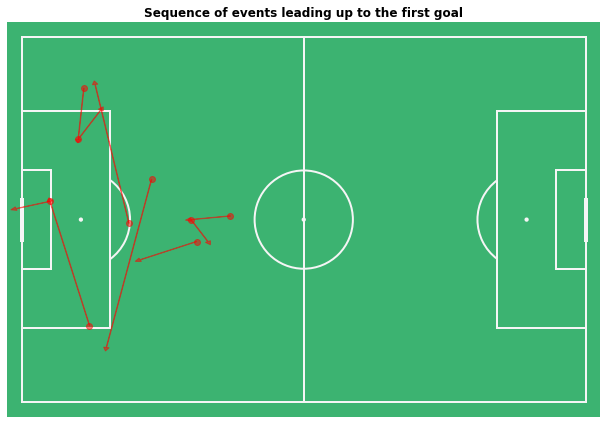

In [29]:
# Plot sequence of events leading up to the first goal - 190 to 198

def plot_events(events, plot_title=None, color='r', figax=None):
    if figax == None:
        fig, ax = plot_pitch('metricasports', 'horizontal', 'mediumseagreen', 'whitesmoke', 105, 68)
    else:
        fig, ax = figax
    plt.title(plot_title, color='k', fontweight='bold')
    for i, event in events.iterrows():
        # print(df_events['Type'].loc[i])
        x_start = event['Start X']
        y_start = event['Start Y']
        x_end = event['End X']
        y_end = event['End Y']

        ax.plot(x_start, y_start, color + 'o', alpha=0.5)
        pass_arrow = plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
                               color=color, width=0.001, head_width=0.01, head_length=0.01, alpha=0.5)


plot_events(df_events.loc[190:198], 'Sequence of events leading up to the first goal')

### Experiments with Tracking Data

In [30]:
# NOTE: Don't read the csv file directly into dataframe since it is a bit messed up.
# Need to extract relevant data and modify the column headers before reading in the csv.
# I have attached a snapshot of the tracking data csv below

![title](tracking_data_snap.png)

In [31]:
# Metrica data folder contains 3 csvs per game - event_data, tracking_data_home, tracking_data_away
# Tracking data has player and ball positions sampled at a frequency of 25 Hz

# Load tracking data of each team from Game 2

import itertools
import csv

match_id = 2
file_path = data_path + data_provider

def load_tracking_data(match_id, file_path, team_name):
    
    file_name = file_path + f'Sample_Game_{match_id}/Sample_Game_{match_id}_RawTrackingData_{team_name}_Team.csv'

    # Extracting relevant data from csv to modify column headers for dataframe
    with open(file_name, 'r') as csv_file:
        columns = next(itertools.islice(csv.reader(csv_file), 2, None))
        # print(columns)

        for index, column in enumerate(columns):
            if column.startswith('Player'):
                column = column.replace('Player', f'{team_name}_')
                columns[index] = column + '_x'
            elif column == 'Ball':
                columns[index] = column + '_x'
            elif column == '':
                columns[index] = columns[index - 1][:-2] + '_y'

    tracking_data = pd.read_csv(file_name, names=columns, index_col='Frame', skiprows=3)
    
    return tracking_data

In [32]:
tracking_home = load_tracking_data(match_id, file_path, 'Home')
tracking_away = load_tracking_data(match_id, file_path, 'Away')

print(tracking_home.shape)
print(tracking_away.shape)

(141156, 32)
(141156, 28)


In [33]:
convert_cooridnates(tracking_home)
convert_cooridnates(tracking_away)

In [34]:
tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,Ball_x,Ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,0.50194,0.38877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,0.50194,0.38877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,0.50194,0.38877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,0.50194,0.38877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,0.50194,0.38877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
tracking_away.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_ 26_x,Away_ 26_y,Ball_x,Ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.01218,0.48237,0.32891,0.18154,0.30734,0.44818,0.32235,0.61046,...,0.49889,1.02263,0.50177,0.49855,0.49517,0.63766,NaN,NaN,NaN,NaN
2,1,0.08,0.01218,0.48237,0.32891,0.18154,0.30734,0.44818,0.32235,0.61046,...,0.49889,1.02263,0.50177,0.49855,0.49517,0.63766,NaN,NaN,NaN,NaN
3,1,0.12,0.01218,0.48237,0.32891,0.18154,0.30734,0.44818,0.32235,0.61046,...,0.49889,1.02263,0.50177,0.49855,0.49517,0.63766,NaN,NaN,NaN,NaN
4,1,0.16,0.01218,0.48237,0.32836,0.18153,0.30734,0.44818,0.32235,0.61046,...,0.49889,1.02263,0.50177,0.49855,0.49517,0.63766,NaN,NaN,NaN,NaN
5,1,0.20,0.01218,0.48237,0.32783,0.18153,0.30734,0.44818,0.32235,0.61046,...,0.49889,1.02263,0.50177,0.49855,0.49517,0.63766,NaN,NaN,NaN,NaN


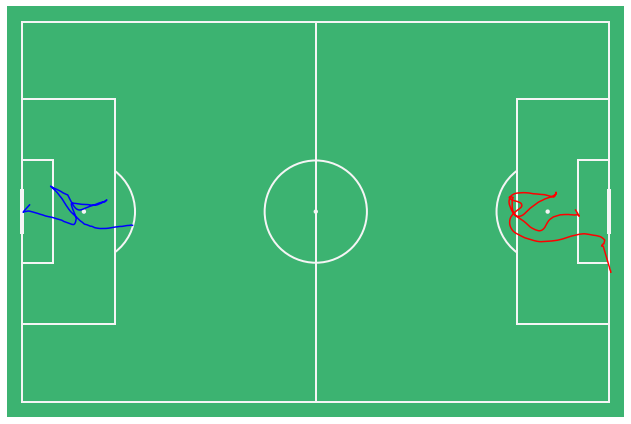

In [36]:
# Plotting player positions over first 60 seconds
# Tracking data is sampled at 25 Hz, so number of frames = 1500

fig, ax = plot_pitch('metricasports', 'horizontal', 'mediumseagreen', 'whitesmoke', 105, 68)

ax.plot(tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r')
ax.plot(tracking_away['Away_25_x'].iloc[:1500], tracking_away['Away_25_y'].iloc[:1500], 'b')


51


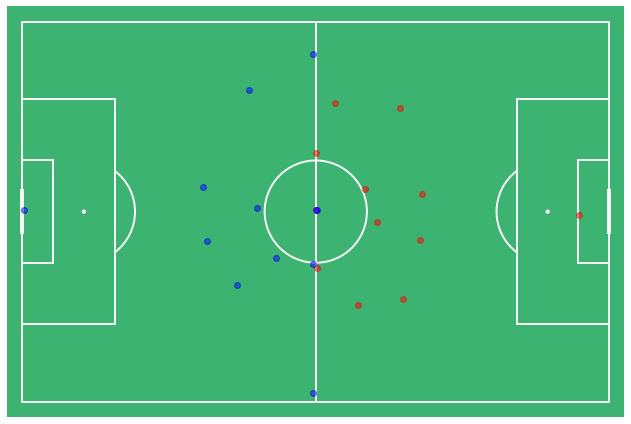

In [37]:
# Plot player locations of both teams at the start of the match
# The Metrica tracking and event datasets are perfectly synced. They can be matched using Start Frame

print(df_events[df_events['Subtype'] == 'KICK OFF']['Start Frame'].iloc[0])

def plot_frame(home_row, away_row, colors=('r', 'b'), figax=None):
    
    if figax == None:
        fig, ax = plot_pitch('metricasports', 'horizontal', 'mediumseagreen', 'whitesmoke', 105, 68)
    else:
        fig, ax = figax
    for team, color in zip([home_row, away_row], colors):
        x_columns = [c for c in team.keys() if c[-2:].lower()=='_x' and c!='ball_x']
        y_columns = [c for c in team.keys() if c[-2:].lower()=='_y' and c!='ball_y']
        ax.plot(team[x_columns], team[y_columns], color + 'o', alpha=0.5)
    
plot_frame(tracking_home.iloc[51], tracking_away.iloc[51])

12202


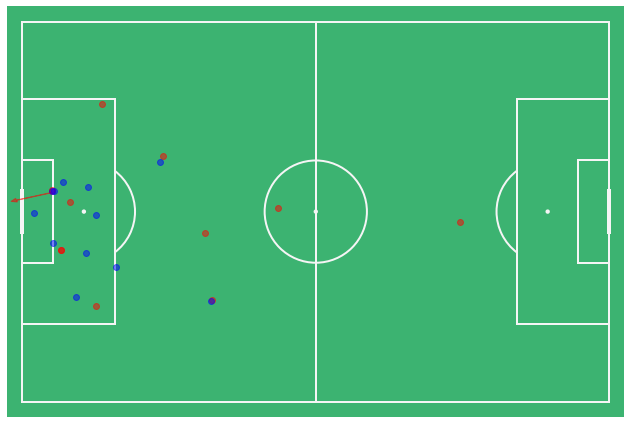

In [38]:
# Plot player locations and shot for the first goal

print(df_events['Start Frame'].loc[198])
plot_frame(tracking_home.iloc[12202], tracking_away.iloc[12202])
plot_events(df_events.loc[198:198], color='r', figax=(fig,ax))

### Exercises

In [39]:
# Plot the passes and shot leading up to the second and third goals in the match

goals = df_events[df_events['Subtype'].str.contains("-GOAL", na=False)]
second_goal = goals['Start Frame'].iloc[1]
third_goal = goals['Start Frame'].iloc[2]

print(second_goal)
print(third_goal)

53049
73983


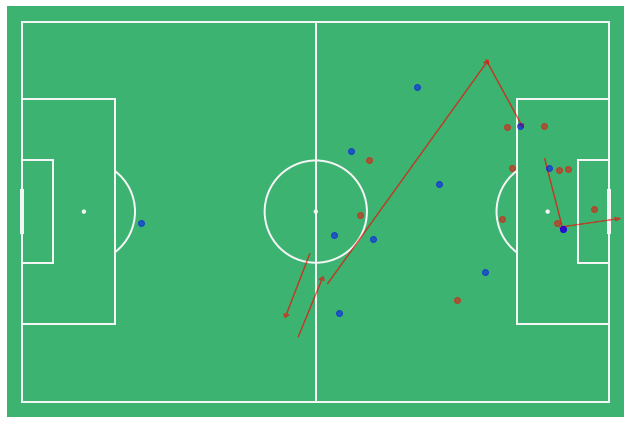

In [40]:
# Second goal

plot_frame(tracking_home.iloc[53049], tracking_away.iloc[53049])
plot_events(df_events.loc[818:823], color='r', figax=(fig,ax))

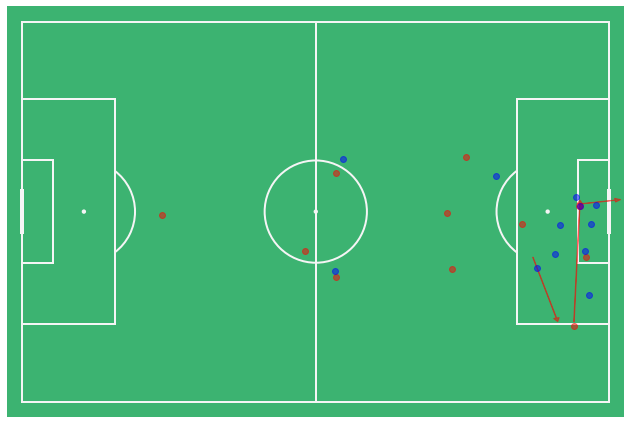

In [41]:
# Third goal

plot_frame(tracking_home.iloc[73983], tracking_away.iloc[73983])
plot_events(df_events.loc[1115:1119], color='r', figax=(fig,ax))

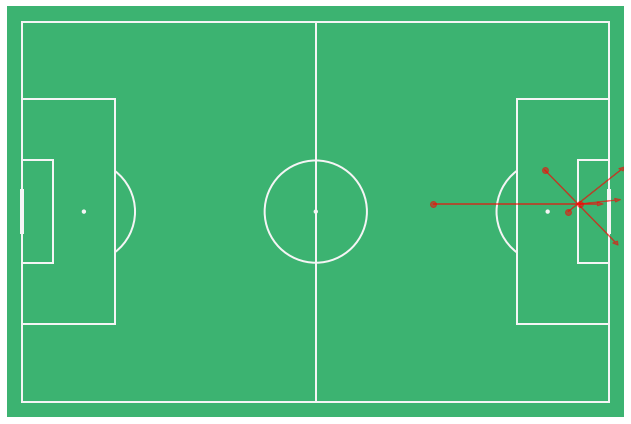

In [42]:
# Plot all shots by Player 9 of the Home team

player_9_shots = home_shots[home_shots['From'] == 'Player9'].copy()

fig, ax = plot_pitch('metricasports', 'horizontal', 'mediumseagreen', 'whitesmoke', 105, 68)
for i in player_9_shots.index:
    plot_events(df_events.loc[i:i], color='r', figax=(fig,ax))

In [43]:
player_9_shots.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,0.95,0.52,1.01,0.53
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,0.89,0.61,1.01,0.42
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,0.93,0.50,1.02,0.61
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,0.70,0.52,0.98,0.52


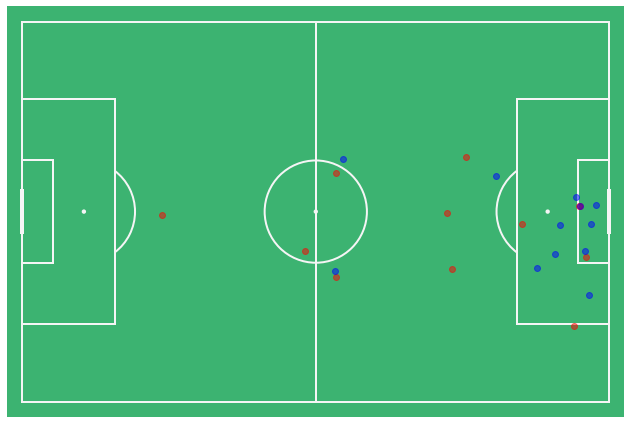

In [44]:
# Plot all player positions when Player 9 scored

plot_frame(tracking_home.iloc[73983], tracking_away.iloc[73983])

In [45]:
# Calculate distance travelled by each player

import numpy as np

def calc_player_distance(df, team_name):
    player_names = [column.strip('_x').strip('_y') for column in df.columns if column.startswith(team_name)]
    player_names = set(player_names)
    print(player_names)

    for player in player_names:
        df[f'Distance_{player}'] = (np.sqrt((105 * df[f'{player}_x'].diff()) ** 2 + 
                                            (68 * df[f'{player}_y'].diff()) ** 2))


In [46]:
calc_player_distance(tracking_home, "Home")
calc_player_distance(tracking_away, "Away")

{'Home_13', 'Home_11', 'Home_9', 'Home_1', 'Home_8', 'Home_2', 'Home_7', 'Home_12', 'Home_3', 'Home_6', 'Home_10', 'Home_5', 'Home_14', 'Home_4'}
{'Away_20', 'Away_24', 'Away_21', 'Away_15', 'Away_ 26', 'Away_18', 'Away_25', 'Away_23', 'Away_19', 'Away_17', 'Away_16', 'Away_22'}


In [47]:
tracking_home['Distance_Home_11'].sum()

5297.041583852721

In [48]:
tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Distance_Home_8,Distance_Home_2,Distance_Home_7,Distance_Home_12,Distance_Home_3,Distance_Home_6,Distance_Home_10,Distance_Home_5,Distance_Home_14,Distance_Home_4
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.000000,NaN,0.0
3,1,0.12,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.000000,NaN,0.0
4,1,0.16,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.089253,NaN,0.0
5,1,0.20,0.94275,0.49587,0.64812,0.71395,0.67752,0.57197,0.69882,0.44394,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.088203,NaN,0.0


In [49]:
tracking_away.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Distance_Away_21,Distance_Away_15,Distance_Away_ 26,Distance_Away_18,Distance_Away_25,Distance_Away_23,Distance_Away_19,Distance_Away_17,Distance_Away_16,Distance_Away_22
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.01218,0.48237,0.32891,0.18154,0.30734,0.44818,0.32235,0.61046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.01218,0.48237,0.32891,0.18154,0.30734,0.44818,0.32235,0.61046,...,0.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.12,0.01218,0.48237,0.32891,0.18154,0.30734,0.44818,0.32235,0.61046,...,0.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.16,0.01218,0.48237,0.32836,0.18153,0.30734,0.44818,0.32235,0.61046,...,0.0,0.057754,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0.20,0.01218,0.48237,0.32783,0.18153,0.30734,0.44818,0.32235,0.61046,...,0.0,0.055650,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
